In [1]:
import pandas as pd
from scipy.io import savemat
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from helpers_ramd import *

<p style="color: brown; font-size: 24px;"><strong><em>1) Data loading</em></strong></p>

In [2]:
# Pandas - openpyxl 
data = load_excel(r'C:\Users\anast\Desktop\Ramd_calc\Data_xlsx\results pbcatom.xlsx')
data2 = load_excel(r'C:\Users\anast\Desktop\Ramd_calc\Data_xlsx\results pbcatom ADDITIONAL.xlsx')

In [3]:
forces_data = {
    'force250': data[:, [0, 1]],
    'force275': data[:, [3, 4]],
    'force300': data[:, [6, 7]],
    'force325': data[:, [9, 10]],
    'force350': data[:, [12, 13]],
    'force375': data[:, [15, 16]],
    'force400': data[:, [18, 19]],
    'force425': data[:, [21, 22]],
    'force450': data[:, [24, 25]],
    'force475': data[:, [27, 28]],
    'force500': data[:, [30, 31]],
    'force525': data[:, [33, 34]],
    'force550': data[:, [36, 37]],
    'force575': data[:, [39, 40]],
    # 'force600': data[:, [42, 43]],
    # 'force588': data[:, [3, 40]],
    # 'force575': data[:, [6, 7]],
    # 'force563': data[:, [9, 10]],
    # 'force538': data[:, [15, 16]],
    # 'force513': data[:, [21, 22]],
    # 'force488': data[:, [27, 28]],
    # 'force475': data[:, [30, 31]],
    # 'force463': data[:, [33, 34]],
    # 'force425': data[:, [39, 40]],
    # 'force375': data[:, [45, 46]],
    # 'force350': data[:, [48, 49]],
    # 'force325': data[:, [51, 52]],
    # 'force300': data[:, [54, 55]],
    # 'force275': data[:, [57, 58]],
    # 'force250': data[:, [60, 61]]
 # второй набор: results pbcatom ADDITIONAL.xlsx :  
    'force488': data2[:, [0, 1]],
    'force513': data2[:, [3, 4]],
    'force538': data2[:, [6, 7]],
    'force563': data2[:, [9, 10]],
    'force588': data2[:, [12, 13]],
    'force263': data2[:, [15, 16]],
    'force288': data2[:, [18, 19]],
    'force313': data2[:, [21, 22]],
    'force338': data2[:, [24, 25]],
    'force363': data2[:, [27, 28]],
    'force388': data2[:, [30, 31]],
    'force413': data2[:, [33, 34]],
    'force438': data2[:, [36, 37]],
    'force463': data2[:, [39, 40]]
}

for key in forces_data:
    forces_data[key] = np.array(forces_data[key], dtype=float)
    
savemat(r'C:\Users\anast\Desktop\RAMD\matscripts\forces_with_pbcatom.mat', forces_data)

In [4]:
# создаем пустые массивы, которые будут заполняться значениями
tau_all = [] #список всех времен диссоциации
forces_all = [] # список сил
pend_var = [] # для коэффициентов линейной аппроксимации
tau_var = [] # для хранения значений времени диссоциации
lambda_var = [] # значения скорости диссоциации

<p style="color: brown; font-size: 24px;"><strong><em>2) Procedure of approximation and its interpretation</em></strong><br><span style="font-size: 18px; font-style: italic;">Data loading and initial processing</span></p>

<p style="color: darkblue; font-size: 24px;"><strong><em> force 250 : </em></strong></p>

In [5]:
force = forces_data['force250']
force_value = 250

# Filtering
valid_data = (force[:, 1] > 0) & (~np.isnan(force[:, 1]))
t = force[valid_data, 0]
N = force[valid_data, 1]

<span style="color:darkblue;font-size: 18px;"><em>а) Поиск классической экпоненциальной релаксации:</em></span>

In [6]:
tau_frac = 15500
N_cut_max = 13

In [7]:
N0 = N[0] 
n = np.log(N / N0)

In [8]:
calculate_dissociation_rates(t, n, N, N_cut_max, tau_frac, tau_var, lambda_var, pend_var)
print("tau_var:", tau_var)
print("lambda_var:", lambda_var)

tau_var: [2.327723210471358, 2.918085047998354, 3.726005080365139, 3.860288824372526, 3.895274370738051, 3.455521269163856, 1.486313322924282, 1.532312945503681, 1.514070033696745, 1.343795448412747, 1.448921520062662, 1.537635853521032, 1.741051527587008]
lambda_var: [-0.429604342776434, -0.342690491727082, -0.268383960416394, -0.259047974256834, -0.256721325591893, -0.289391938901876, -0.672805649102658, -0.652608204436525, -0.660471429817817, -0.744160877446915, -0.690168505438964, -0.650349039215039, -0.574365539534571]


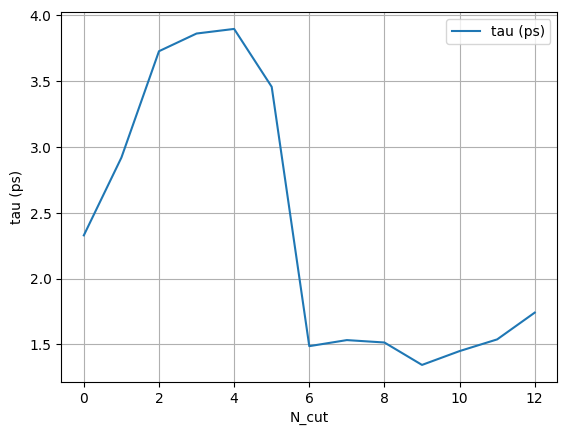

In [9]:
plt.plot(range(N_cut_max), tau_var, label='tau (ps)')
plt.xlabel('N_cut')
plt.ylabel('tau (ps)')
plt.grid(True)
plt.legend()
plt.show()


In [10]:
N_cut = 6

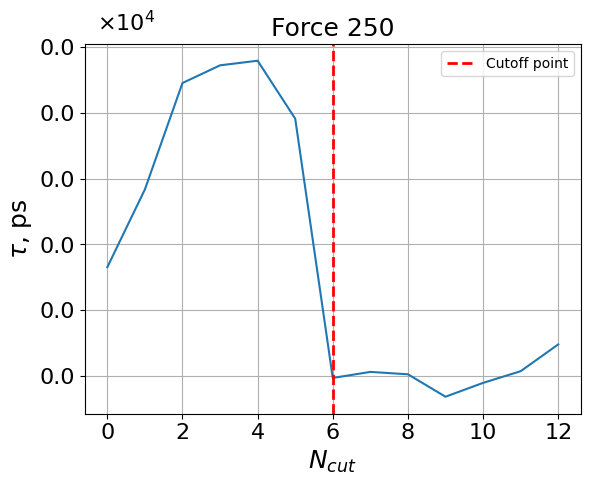

In [11]:
a = np.arange(0, N_cut_max)
plot_tau_with_cutoff(a, tau_var, N_cut, tau_var, force_value)

<span style="color:darkblue;font-size: 18px;"><em>б) Начальная неклассическая (дробная) релаксация:</em></span>

In [12]:
# Define t0 and tend (depending on the data)
t0 = 21  # since Python indexes from zero, we need to subtract 1
tend = 63

In [13]:
p, pinit = plot_init_part_ln_ln(force_value, n, t, t0, tend)
print(f"p: {p}, pinit: {pinit}")
print("t[t0:tend]:", t[t0:tend])
print("n[t0:tend]:", n[t0:tend])

p: 1.9563890424232262, pinit: [  1.95638904 -19.4153905 ]
t[t0:tend]: [ 5250.  5500.  5750.  6000.  6250.  6500.  6750.  7000.  7250.  7500.
  7750.  8000.  8250.  8500.  8750.  9000.  9250.  9500.  9750. 10000.
 10250. 10500. 10750. 11000. 11250. 11500. 11750. 12000. 12250. 12500.
 12750. 13000. 13250. 13500. 13750. 14000. 14250. 14500. 14750. 15000.
 15250. 15500.]
n[t0:tend]: [-0.04082199 -0.04082199 -0.04082199 -0.08338161 -0.08338161 -0.17435339
 -0.17435339 -0.17435339 -0.17435339 -0.17435339 -0.17435339 -0.17435339
 -0.17435339 -0.22314355 -0.22314355 -0.22314355 -0.22314355 -0.22314355
 -0.22314355 -0.32850407 -0.32850407 -0.32850407 -0.32850407 -0.32850407
 -0.32850407 -0.32850407 -0.32850407 -0.32850407 -0.38566248 -0.38566248
 -0.38566248 -0.38566248 -0.4462871  -0.4462871  -0.4462871  -0.4462871
 -0.4462871  -0.4462871  -0.4462871  -0.4462871  -0.4462871  -0.4462871 ]


In [14]:
# Values of tau and lambda for N_cut = 6
tau = tau_var[N_cut]
lambda_ = lambda_var[N_cut] * 1e-4
print(f"tau: {tau}, lambda: {lambda_}")

tau: 1.486313322924282, lambda: -6.72805649102658e-05


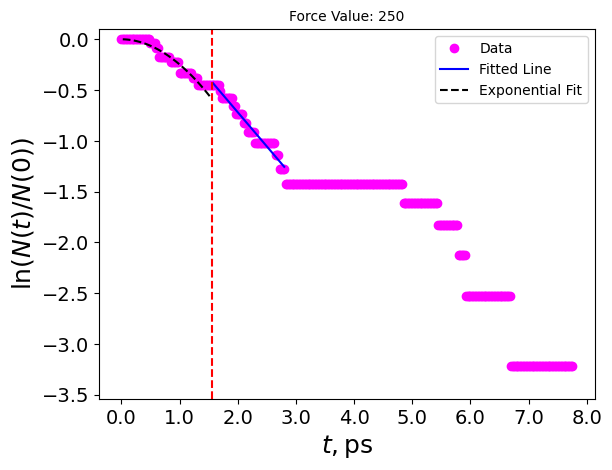

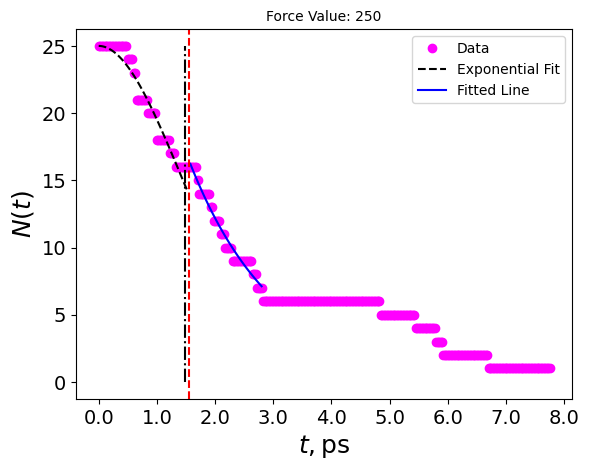

In [15]:
# Filtering data based on both conditions
t_fit = t[(N > N_cut) & (t > tau_frac)]
n_fit = n[(N > N_cut) & (t > tau_frac)]

# Calling functions with filtered data
plot_lnN(force_value, t, t_fit, n, tau_frac, pend_var[N_cut], pinit)
plot_N(force_value, t, t_fit, N, N0, tau_frac, pend_var[N_cut], pinit)

In [16]:
tau_all.append(tau)
forces_all.append(force_value)

<p style="color: darkblue; font-size: 24px;"><strong><em> force 263 :</em></strong></p>